In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.stats.multitest as smm

In [48]:
ROOT = '/data1/wgs_APA/validation_res/'
GEM0 = 'gem0/'
GEM1 = 'gem1/'
MAAPER_OUT = 'MAAPER_out/'

# Get the list of selected genes

In [66]:
genes = [d.split('_')[0] for d in os.listdir(f'{ROOT}{GEM1}{MAAPER_OUT}')]
genes

['DEDD',
 'CREB5',
 'KDM2B',
 'CEP44',
 'RELB',
 'HOXA4',
 'SLC26A6',
 'PHAX',
 'PROX1',
 'NIP7',
 'UTRN',
 'PPP2CB',
 'HPS1',
 'GSC2',
 'TOR1B',
 'GLYR1',
 'PPARD',
 'KLF9',
 'NKX6-3',
 'UBE2D2',
 'KIN',
 'negative',
 'ZNF215',
 'NFIB',
 'ENSA',
 'NUP214',
 'TEAD3',
 'ZNF530',
 'RDH11',
 'MED1',
 'RELN',
 'ASCL2',
 'ZNF527',
 'MECOM',
 'HNRNPC',
 'MRPL9',
 'RBM15B',
 'HOMEZ',
 'MLEC',
 'IFITM2',
 'RPL37',
 'TAF15',
 'TFDP1',
 'ZNF623',
 'TWIST1',
 'ZNF232',
 'HOXA3',
 'NR5A1',
 'ETS1',
 'ZDHHC6',
 'ZEB1',
 'KCNIP3',
 'MEX3D',
 'LRRC14',
 'LBX2',
 'FOXE3',
 'ZNF345',
 'FNBP4',
 'SENP3',
 'DHX33',
 'HAUS7',
 'BRIP1',
 'EPB41L5',
 'RPS20',
 'SIX6',
 'HLCS',
 'PPP1R12A',
 'PIR',
 'BIRC2']

In [5]:
genes_GP_apa_df = pd.read_csv('genes_GP_apa_df.csv', index_col=0)
genes_GP_apa_df.head()

term_name    genes  APA_effect
1  nuclear lumen   SPECC1   -3.416269
2  nuclear lumen  RPS6KA1    5.813447
3  nuclear lumen     CLK3    2.457411
4  nuclear lumen     DEDD  -13.204945
5  nuclear lumen   INTS13    1.644397

In [57]:
data_dir = '/data1/wgs_APA/MAAPER_out'
genes_dirs = os.listdir(data_dir)

genes_pas = {}
for gene in genes_dirs:
    try:
        gene_name = gene.split('_')[0]
        gene_pas = pd.read_csv(data_dir + "/" + gene + '/gene.txt' ,sep='\t', index_col=0)
        genes_pas[gene_name] = gene_pas
    except:
        continue
    
shapes = []
for pgene in genes_pas:
    print(pgene)
    shapes.append(genes_pas[pgene].shape)

# for each gene in genes_pas, lets filter the genes_pas['gene'] to only keep rows with npas > 1

genes_pas_filtered = {}
for gene in genes_pas:
    genes_pas_filtered[gene] = genes_pas[gene][genes_pas[gene]['npas'] > 1]
genes_pas_filtered

CD8B
ZNF589
BYSL
IP6K2
EBF2
MEIS2
BUD23
NOS1AP
MYF6
TARBP2
SPECC1
RBM6
TRAPPC1
SF3B2
RPS6KA1
LARP1
PRKCB
COA4
METTL9
CMIP
NR2C1
PTTG1IP
ITPR3
PXMP4
ZNF544
VPS8
TRIM58
ZCCHC8
MAST4
PTOV1
FKBP15
DHRSX
ARL5A
ZER1
NMD3
NUDT4
RPIA
THUMPD1
PTPN23
NCAPH2
ZNF613
TMEM192
PCGF3
PRG2
MPLKIP
RRP8
TMEM243
LIN9
JUNB
SFMBT1
CHMP5
SNX11
LIN28B
UFL1
SLC25A25
RFX2
EIF4A2
FGD6
PSMA4
FBXO8
TOLLIP
NECAP2
APH1A
E2F8
MON1B
ZFP42
TRIM38
OR1D2
ARL6IP1
UBXN2B
THEM4
LYPLAL1
PMM2
FBXO21
SAV1
PTPN12
CUL4B
TMEM164
TRERF1
CRYZL1
TJP2
R3HDM1
USP14
SEPTIN6
KIAA0355
IVNS1ABP
GABARAPL2
ZNF131
P4HA2
GATA4
CLK3
SPRED1
MPC1
TMCO3
MBOAT2
ZBTB11
EHD1
GBE1
SFT2D1
ZC3H7A
PTPRG
CTXN1
PDHX
KRCC1
DEDD
PAQR3
LARP4B
INTS13
MCM8
PLXND1
ARV1
CTDP1
BHLHE41
GULP1
INO80B
TMEM80
FBXW7
SLC6A8
SLC39A6
ZDHHC20
TOP1
KLF14
WDFY2
SON
BRD1
GRTP1
NKX3-2
ETV6
ZFP69B
NPRL2
NADK2
TRIP6
MRM2
METTL5
SARS2
POLR3GL
GNL1
CCDC169-SOHLH2
KDM8
CYP3A5
UBN1
ATP7A
KDELR3
NR1H3
C6orf15
CRK
TTC13
ZNF35
MAFF
ZNF517
KIF1B
NAGA
SDCBP
TMBIM4
SSNA1
LGMN
CNTRL
PASD1


{'CD8B':         npas    pval    RLDu   RLDi    REDu  REDu.pval   REDi  REDi.pval  \
 gene                                                                       
 ALDOA      2  0.7450 -0.2030    NaN  -0.992   0.116000    NaN        NaN   
 ANP32B     4  0.0387 -0.8290  0.632  -2.450   0.000117  2.020    0.01880   
 BLVRB      3  0.2830 -2.9400 -0.896  -3.560   0.008760 -3.840    0.01370   
 BTF3       4  0.0066  0.0266 -1.250   2.650   0.000770 -0.186    0.69900   
 CALR       3  0.6300 -0.0704  0.368  -0.920   0.126000  1.150    0.10400   
 ...      ...     ...     ...    ...     ...        ...    ...        ...   
 TPT1       4  0.0140 -1.2200  0.394  -2.350   0.000172  1.260    0.00249   
 UBA52      4  0.2580 -1.2600 -1.020  -0.985   0.272000 -1.600    0.07360   
 UBAC1      2  0.9800     NaN  0.125     NaN        NaN  0.125    1.00000   
 UQCR11     3  0.0485 -8.0600    NaN -56.500   0.719000    NaN        NaN   
 YBX1       3  0.6310 -0.2270 -0.244  -0.370   0.242000 -0.427    0.

In [6]:
genes_pas['HNRNPC']

npas          pval     RLDu  RLDi      REDu     REDu.pval  REDi  \
gene                                                                       
ACTB        2  9.990000e-01  0.00235   NaN    0.0452  1.000000e+00   NaN   
ALDOA       2  4.550000e-03  0.23900   NaN   34.5000  2.330000e-02   NaN   
ANP32B      4  1.520000e-26  0.74600  1.51    4.7600  4.960000e-27  4.32   
ARF5        2  8.330000e-17  5.54000   NaN    6.8900  6.640000e-17   NaN   
ARPC3       2  1.310000e-13  1.58000   NaN  102.0000  2.330000e-12   NaN   
...       ...           ...      ...   ...       ...           ...   ...   
SLC25A5     1           NaN      NaN   NaN       NaN           NaN   NaN   
SNRPB       1           NaN      NaN   NaN       NaN           NaN   NaN   
TUBA1B      1           NaN      NaN   NaN       NaN           NaN   NaN   
UQCRH       1           NaN      NaN   NaN       NaN           NaN   NaN   
VDAC2       1           NaN      NaN   NaN       NaN           NaN   NaN   

            REDi.pval  nread.c1.1  nread.c2.1  
gene                                           
ACTB              NaN       13338          39  
ALDOA             NaN        7187          38  
ANP32B   2.360000e-16        6684          64  
ARF5              NaN        1641          28  
ARPC3             NaN        3025          27  
...               ...         ...         ...  
SLC25A5           NaN        2692          28  
SNRPB             NaN        4193          32  
TUBA1B            NaN       12115          32  
UQCRH             NaN       12522          34  
VDAC2             NaN        2504          33  

[182 rows x 10 columns]

In [7]:
genes_pas['HNRNPC'].columns

Index(['npas', 'pval', 'RLDu', 'RLDi', 'REDu', 'REDu.pval', 'REDi',
       'REDi.pval', 'nread.c1.1', 'nread.c2.1'],
      dtype='object')

In [58]:
def get_affected_genes_num(gene):
    global genes_pas
    tmp = genes_pas[gene]
    # remove NAs on REDu columns
    tmp = tmp[~tmp['REDu'].isna()]
    # keep significant rows based on REDu.pval column
    tmp = tmp[tmp['REDu.pval'] < 0.05]
    tmp_positive = tmp[tmp['REDu'] > 0]
    tmp_negative = tmp[tmp['REDu'] < 0]

    return (tmp_positive.shape[0], tmp_positive['REDu'].median()), (tmp_negative.shape[0], tmp_negative['REDu'].median())

In [59]:
get_affected_genes_num('TAF15')

((91, 4.59), (10, -1.72))

In [23]:
# drop name 'negative' from list genes
idx = genes.index('negative')
genes.pop(idx)

'negative'

In [78]:
results = []
for gene in genes:
    # Call your function
    try:
        positive_info, negative_info = get_affected_genes_num(gene) 
        # Create a dictionary for this gene
        gene_dict = {
            'Gene': gene,
            'lengthened_genes': positive_info[0],
            'distal_APA_effect': positive_info[1],
            'shortened_genes': negative_info[0],
            'proximal_APA_effect': negative_info[1]
        }
        
        # Append to results
        results.append(gene_dict)
    except:
        continue

# Convert list of dictionaries to DataFrame
JW_df = pd.DataFrame(results)

# Display DataFrame
print(JW_df)


        Gene  lengthened_genes  distal_APA_effect  shortened_genes  \
0       DEDD                 7              4.920              102   
1      CREB5                74              6.215               34   
2      KDM2B                72              3.775               33   
3      CEP44                90              4.585               18   
4       RELB                38              1.760               83   
..       ...               ...                ...              ...   
63      SIX6                51              2.390               86   
64      HLCS                53              2.510               50   
65  PPP1R12A                75              2.330              148   
66       PIR               103              4.130               56   
67     BIRC2                76              3.360               31   

    proximal_APA_effect  
0                -8.030  
1                -2.900  
2                -2.330  
3                -2.655  
4                -2.290  
.. 

In [79]:
JW_df

Gene  lengthened_genes  distal_APA_effect  shortened_genes  \
0       DEDD                 7              4.920              102   
1      CREB5                74              6.215               34   
2      KDM2B                72              3.775               33   
3      CEP44                90              4.585               18   
4       RELB                38              1.760               83   
..       ...               ...                ...              ...   
63      SIX6                51              2.390               86   
64      HLCS                53              2.510               50   
65  PPP1R12A                75              2.330              148   
66       PIR               103              4.130               56   
67     BIRC2                76              3.360               31   

    proximal_APA_effect  
0                -8.030  
1                -2.900  
2                -2.330  
3                -2.655  
4                -2.290  
..                  ...  
63               -2.000  
64               -2.480  
65               -2.565  
66               -2.700  
67               -2.700  

[68 rows x 5 columns]

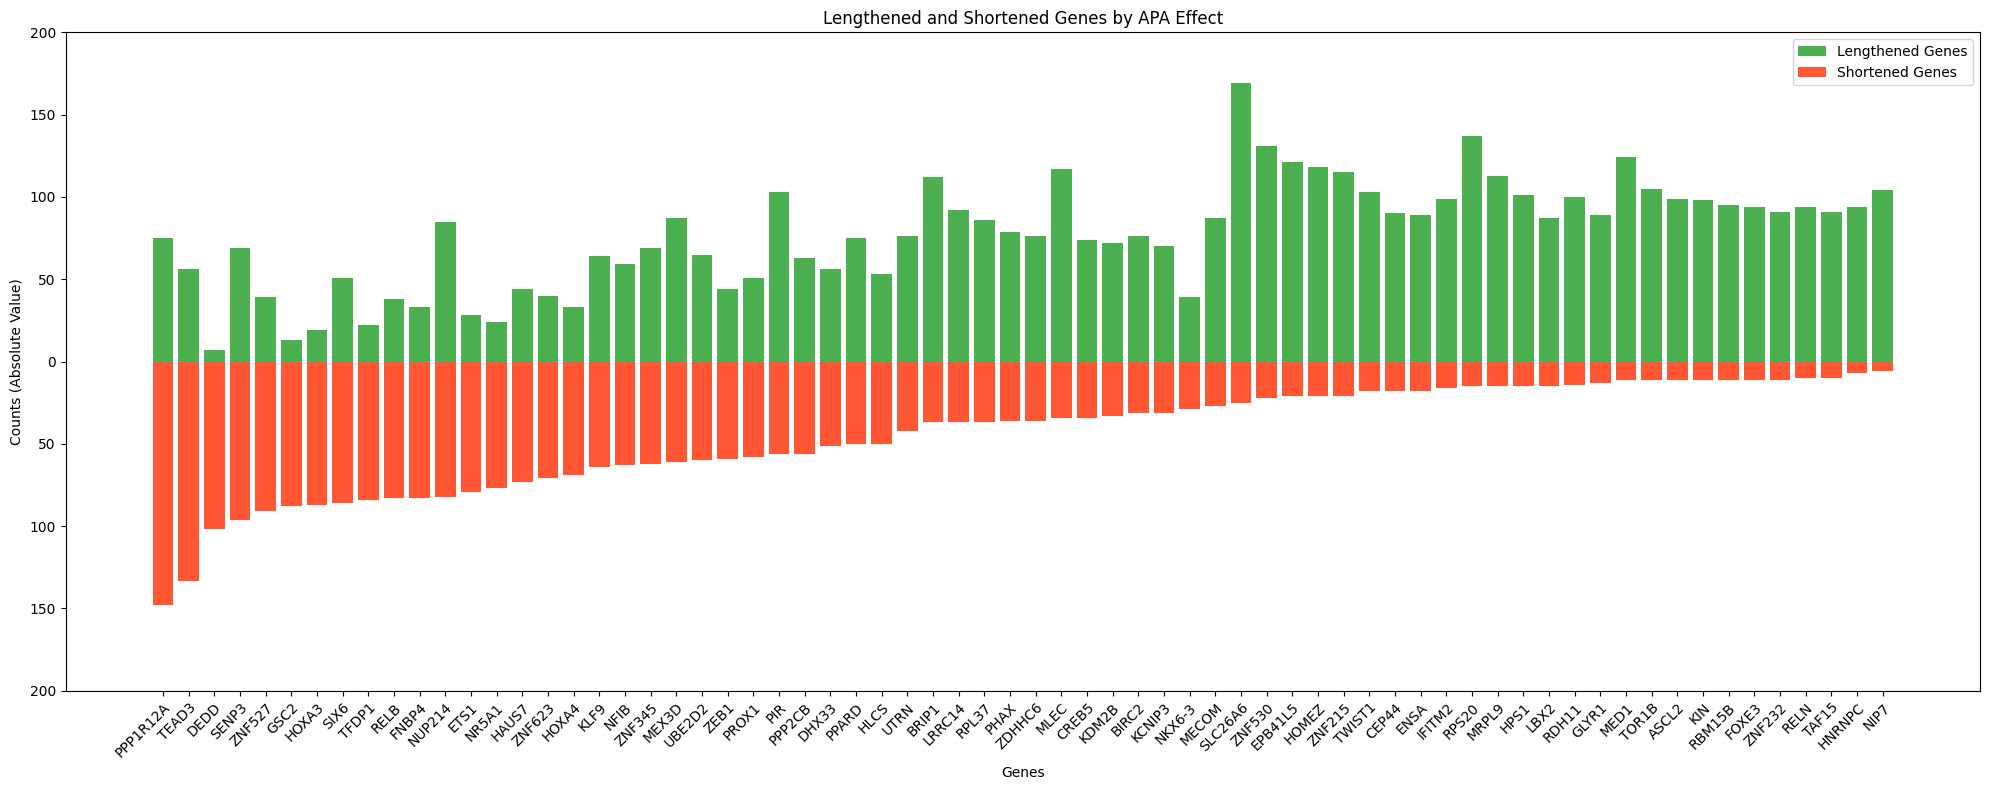

In [81]:
df = JW_df.copy()
# Sort DataFrame first based on shortened genes in descending order and then based on lengthened genes also in descending order
df = df.sort_values(by=['shortened_genes', 'lengthened_genes'], ascending=[False, False])

# Values for plotting
genes = df['Gene']
lengthened_genes = df['lengthened_genes']
shortened_genes = df['shortened_genes']
distal_APA_effects = df['distal_APA_effect']
proximal_APA_effects = df['proximal_APA_effect']

# Create a new figure and set the size
plt.figure(figsize=(20, 8))

# Create bar plots
# Bar plots for lengthened genes on top
plt.bar(genes, lengthened_genes, color='#4CAF50', label='Lengthened Genes')  # Using green-ish color

# Bar plots for shortened genes on the bottom
plt.bar(genes, -np.array(shortened_genes), color='#FF5733', label='Shortened Genes')  # Using red-ish color

# Adding labels and title
plt.xlabel('Genes')
plt.ylabel('Counts (Absolute Value)')
plt.title('Lengthened and Shortened Genes by APA Effect')

# Customize y-ticks to show as positive
yticks = plt.yticks()[0]
plt.yticks(yticks, [str(abs(int(y))) for y in yticks])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

# Adding legend
plt.legend()

# # Show APA effect labels on each bar
# for i, (lg, sg, da, pa) in enumerate(zip(lengthened_genes, shortened_genes, distal_APA_effects, proximal_APA_effects)):
#     plt.text(i, lg, f"{da:.2f}", ha='center', va='bottom', size=10)
#     plt.text(i, -sg, f"{pa:.2f}", ha='center', va='top', size=10)

# Tight layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()


In [68]:

def adjust_pvalues(df):
    """
    Adjust the p-values in the 'REDu.pval' column of the dataframe using the FDR method.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the 'REDu.pval' column.
    
    Returns:
    - pd.DataFrame: Original DataFrame with an additional 'adjusted.pval' column.
    """
    
    # Extract the p-values from the dataframe
    pvals = df['REDu.pval'].values
    
    # Adjust the p-values using the Benjamini-Hochberg procedure
    adjusted_pvals = smm.multipletests(pvals, method='fdr_bh')[1]
    
    # Add the adjusted p-values to the dataframe
    df['adjusted.pval'] = adjusted_pvals
    
    return df

In [96]:
# Initialize dictionaries to store values
stratified_data = {}
gene_list = []


for gene in genes:
    if gene != 'negative':
        try:
            filepath = f'{ROOT}{GEM0}{MAAPER_OUT}{gene}_res/gene.txt'
            df = pd.read_csv(filepath, sep='\t')
            
            # Remove rows with NaN or infinite values
            df = df[~df['REDu'].isin([np.nan, np.inf, -np.inf])]
            # Adjust p-values (assuming you have a function for this)
            df = adjust_pvalues(df)
            
            # Filter based on significance
            df = df[(df['REDu.pval'] < 0.05) & (df['adjusted.pval'] < 0.01)]
            
            # Stratification
            tmp_positive = df[df['REDu'] > 0]
            tmp_negative = df[df['REDu'] < 0]
            
            # Store into dictionary
            stratified_data[gene] = {
                'lengthened_genes': tmp_positive.shape[0],
                'distal_APA_effect': tmp_positive['REDu'].median(),
                'shortened_genes': tmp_negative.shape[0],
                'proximal_APA_effect': tmp_negative['REDu'].median()
            }
            
            gene_list.append(gene)
            
        except Exception as e:
            print(f"An error occurred with gene {gene}: {e}")
            continue

# Create the DataFrame from the dictionary
gem0_stratified_df = pd.DataFrame.from_dict(stratified_data, orient='index')
gem0_stratified_df.reset_index(inplace=True)
gem0_stratified_df.columns = ['Gene', 'lengthened_genes', 'distal_APA_effect', 'shortened_genes', 'proximal_APA_effect']
gem0_stratified_df


Gene  lengthened_genes  distal_APA_effect  shortened_genes  \
0   PPP1R12A               282              1.560              276   
1      TEAD3               268              1.465              323   
2       DEDD               291              1.650              328   
3      SENP3               318              1.510              321   
4     ZNF527               262              1.495              320   
..       ...               ...                ...              ...   
63    ZNF232               255              1.550              270   
64      RELN               256              1.635              303   
65     TAF15               248              1.520              344   
66    HNRNPC               335              1.520              262   
67      NIP7               288              1.525              326   

    proximal_APA_effect  
0                -1.415  
1                -1.430  
2                -1.345  
3                -1.360  
4                -1.285  
..                  ...  
63               -1.510  
64               -1.430  
65               -1.355  
66               -1.575  
67               -1.475  

[68 rows x 5 columns]

In [95]:
# Initialize dictionaries to store values
stratified_data = {}
gene_list = []


for gene in genes:
    if gene != 'negative':
        try:
            filepath = f'{ROOT}{GEM1}{MAAPER_OUT}{gene}_res/gene.txt'
            df = pd.read_csv(filepath, sep='\t')
            
            # Remove rows with NaN or infinite values
            df = df[~df['REDu'].isin([np.nan, np.inf, -np.inf])]
            # Adjust p-values (assuming you have a function for this)
            df = adjust_pvalues(df)
            
            # Filter based on significance
            df = df[(df['REDu.pval'] < 0.05) & (df['adjusted.pval'] < 0.01)]
            
            # Stratification
            tmp_positive = df[df['REDu'] > 0]
            tmp_negative = df[df['REDu'] < 0]
            
            # Store into dictionary
            stratified_data[gene] = {
                'lengthened_genes': tmp_positive.shape[0],
                'distal_APA_effect': tmp_positive['REDu'].median(),
                'shortened_genes': tmp_negative.shape[0],
                'proximal_APA_effect': tmp_negative['REDu'].median()
            }
            
            gene_list.append(gene)
            
        except Exception as e:
            print(f"An error occurred with gene {gene}: {e}")
            continue

# Create the DataFrame from the dictionary
gem1_stratified_df = pd.DataFrame.from_dict(stratified_data, orient='index')
gem1_stratified_df.reset_index(inplace=True)
gem1_stratified_df.columns = ['Gene', 'lengthened_genes', 'distal_APA_effect', 'shortened_genes', 'proximal_APA_effect']
gem1_stratified_df


An error occurred with gene BIRC2: [Errno 2] No such file or directory: '/data1/wgs_APA/validation_res/gem1/MAAPER_out/BIRC2_res/gene.txt'


Gene  lengthened_genes  distal_APA_effect  shortened_genes  \
0   PPP1R12A               540              1.305              195   
1      TEAD3               548              1.275              206   
2       DEDD               237              1.610              269   
3      SENP3               475              1.190              196   
4     ZNF527               383              1.270              212   
..       ...               ...                ...              ...   
62    ZNF232               186              1.795              307   
63      RELN               593              1.290              207   
64     TAF15               225              1.660              267   
65    HNRNPC               410              1.230              198   
66      NIP7               233              1.610              266   

    proximal_APA_effect  
0                -1.750  
1                -1.715  
2                -1.480  
3                -1.635  
4                -1.620  
..                  ...  
62               -1.380  
63               -1.690  
64               -1.390  
65               -1.850  
66               -1.480  

[67 rows x 5 columns]

In [101]:
# Create a new DataFrame with the same columns
new_row_df = pd.DataFrame({
    'Gene': ['BIRC2'],
    'lengthened_genes': [0],
    'distal_APA_effect': [0],
    'shortened_genes': [0],
    'proximal_APA_effect': [0]
})

# Concatenate the original DataFrame with the new DataFrame
gem1_stratified_df = pd.concat([gem1_stratified_df, new_row_df], ignore_index=True)

/tmp/ipykernel_56979/588356283.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(tick) for tick in ticks])


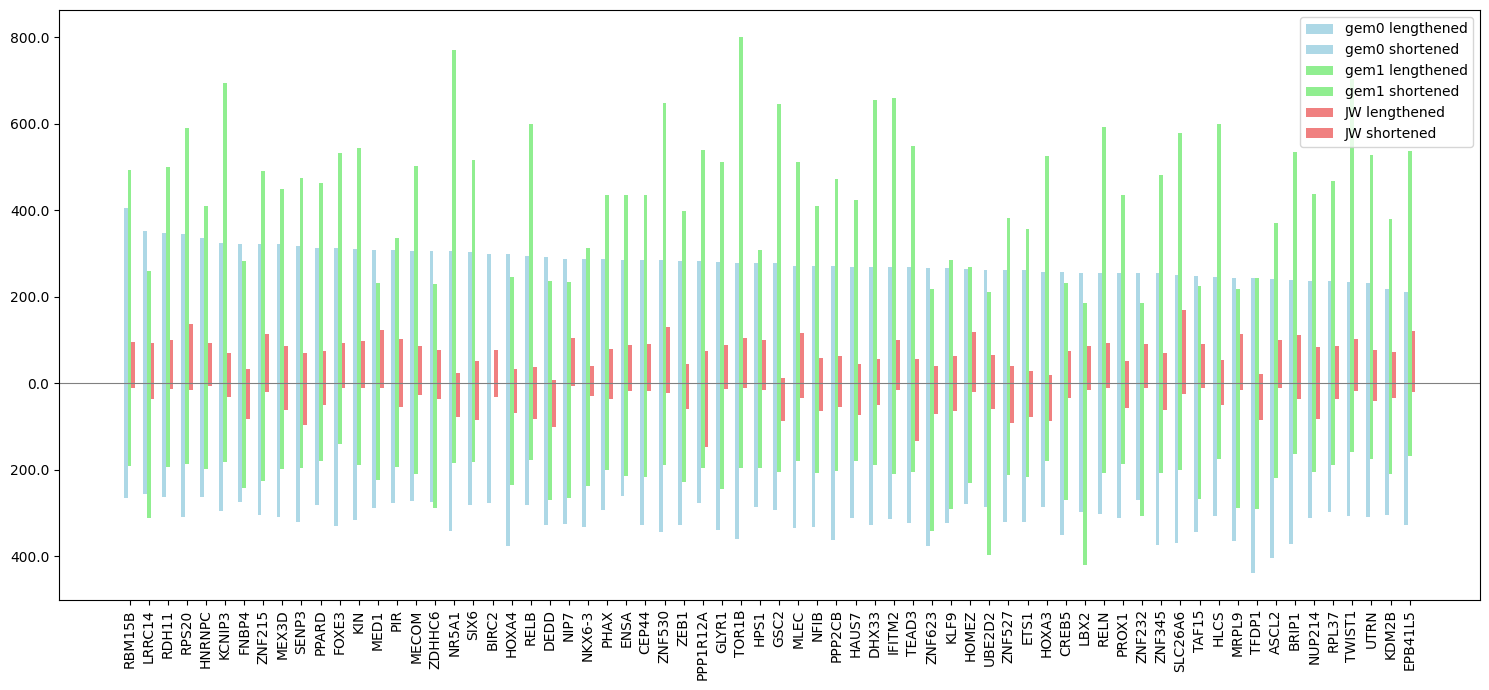

In [104]:
sorted_df = gem0_stratified_df.sort_values(by=['lengthened_genes', 'shortened_genes'], ascending=[False, True])
sorted_genes = sorted_df['Gene']

gem0_stratified_df = gem0_stratified_df.set_index('Gene').loc[sorted_genes].reset_index()
gem1_stratified_df = gem1_stratified_df.set_index('Gene').loc[sorted_genes].reset_index()
JW_df = JW_df.set_index('Gene').loc[sorted_genes].reset_index()

# Bar positions
N = len(gem0_stratified_df)
ind = np.arange(N)
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))

# Bars for gem0_stratified_df
p1 = ax.bar(ind - width, gem0_stratified_df['lengthened_genes'], width, color='lightblue', label='gem0 lengthened')
p2 = ax.bar(ind - width, -gem0_stratified_df['shortened_genes'], width, color='lightblue', label='gem0 shortened')

# Bars for gem1_stratified_df
p3 = ax.bar(ind, gem1_stratified_df['lengthened_genes'], width, color='lightgreen', label='gem1 lengthened')
p4 = ax.bar(ind, -gem1_stratified_df['shortened_genes'], width, color='lightgreen', label='gem1 shortened')

# Bars for JW_df
p5 = ax.bar(ind + width, JW_df['lengthened_genes'], width, color='lightcoral', label='JW lengthened')
p6 = ax.bar(ind + width, -JW_df['shortened_genes'], width, color='lightcoral', label='JW shortened')

# Label the bars with APA effect values
# for i, v in enumerate(gem0_stratified_df['distal_APA_effect']):
#     ax.text(ind[i] - width, gem0_stratified_df['lengthened_genes'][i], str(round(v, 2)), color='blue', va='bottom', ha='center')

# for i, v in enumerate(gem0_stratified_df['proximal_APA_effect']):
#     ax.text(ind[i] - width, -gem0_stratified_df['shortened_genes'][i], str(round(v, 2)), color='blue', va='top', ha='center')

# More labels, etc.
ax.axhline(0, color='grey', lw=0.8)
ax.set_xticks(ind)
ax.set_xticklabels(sorted_genes, rotation='vertical')
ax.legend()

# Fix y-axis labels to display positive values on both sides
ticks = ax.get_yticks()
ax.set_yticklabels([abs(tick) for tick in ticks])

plt.tight_layout()
plt.show()


In [107]:
gem0_stratified_df['DataSource'] = 'gem0'
gem1_stratified_df['DataSource'] = 'gem1'
JW_df['DataSource'] = 'JW'

# Combine the three DataFrames into one
combined_df = pd.concat([gem0_stratified_df, gem1_stratified_df, JW_df], ignore_index=True)
combined_df

Gene  lengthened_genes  distal_APA_effect  shortened_genes  \
0     RBM15B               406              1.500              265   
1     LRRC14               353              1.400              256   
2      RDH11               347              1.380              262   
3      RPS20               344              1.440              309   
4     HNRNPC               335              1.520              262   
..       ...               ...                ...              ...   
199    RPL37                86              3.185               37   
200   TWIST1               103              5.590               18   
201     UTRN                76              3.410               42   
202    KDM2B                72              3.775               33   
203  EPB41L5               121              6.720               21   

     proximal_APA_effect DataSource  
0                 -1.530       gem0  
1                 -1.500       gem0  
2                 -1.425       gem0  
3                 -1.380       gem0  
4                 -1.575       gem0  
..                   ...        ...  
199               -2.400         JW  
200               -2.525         JW  
201               -3.085         JW  
202               -2.330         JW  
203               -2.680         JW  

[204 rows x 6 columns]

/home/aiden/anaconda3/envs/apa_wgs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


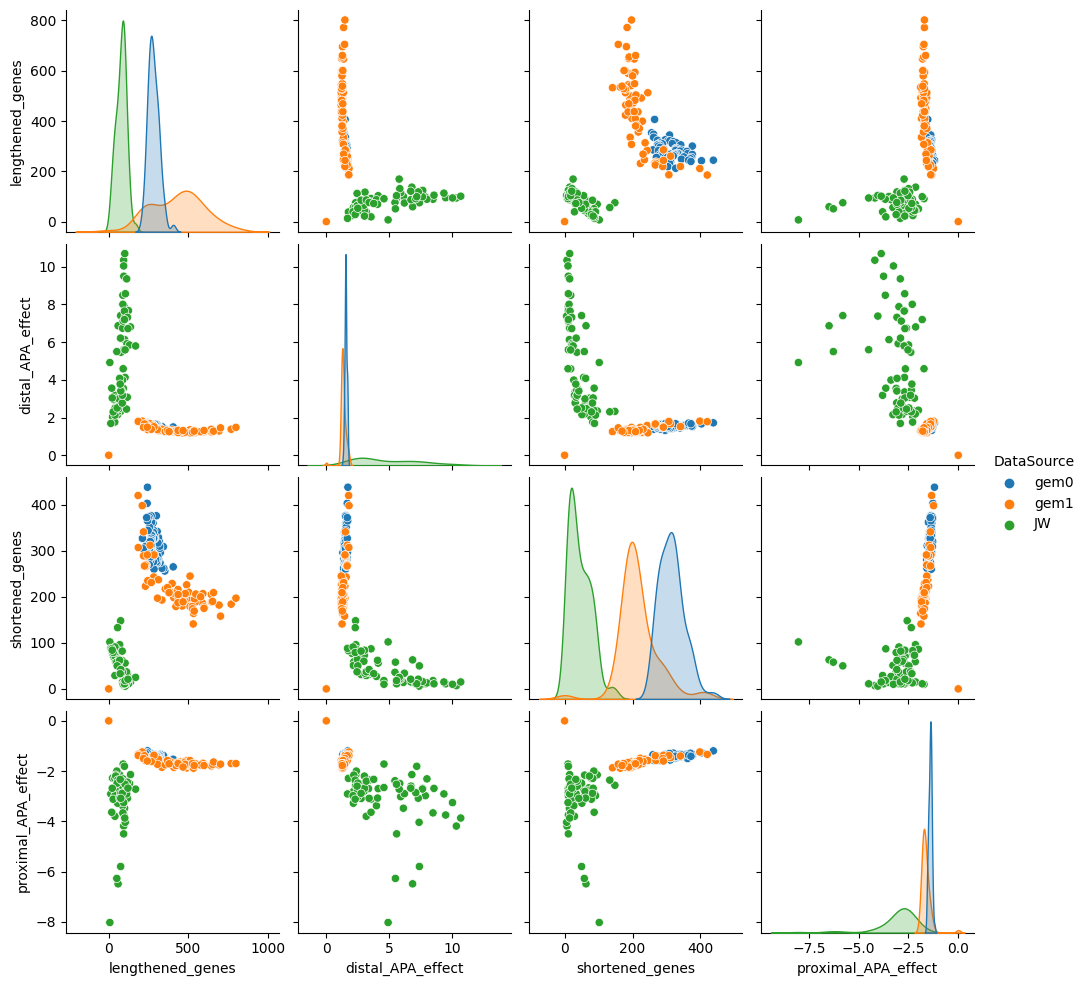

In [109]:
sns.pairplot(data=combined_df, hue='DataSource', diag_kind='kde')
plt.show()


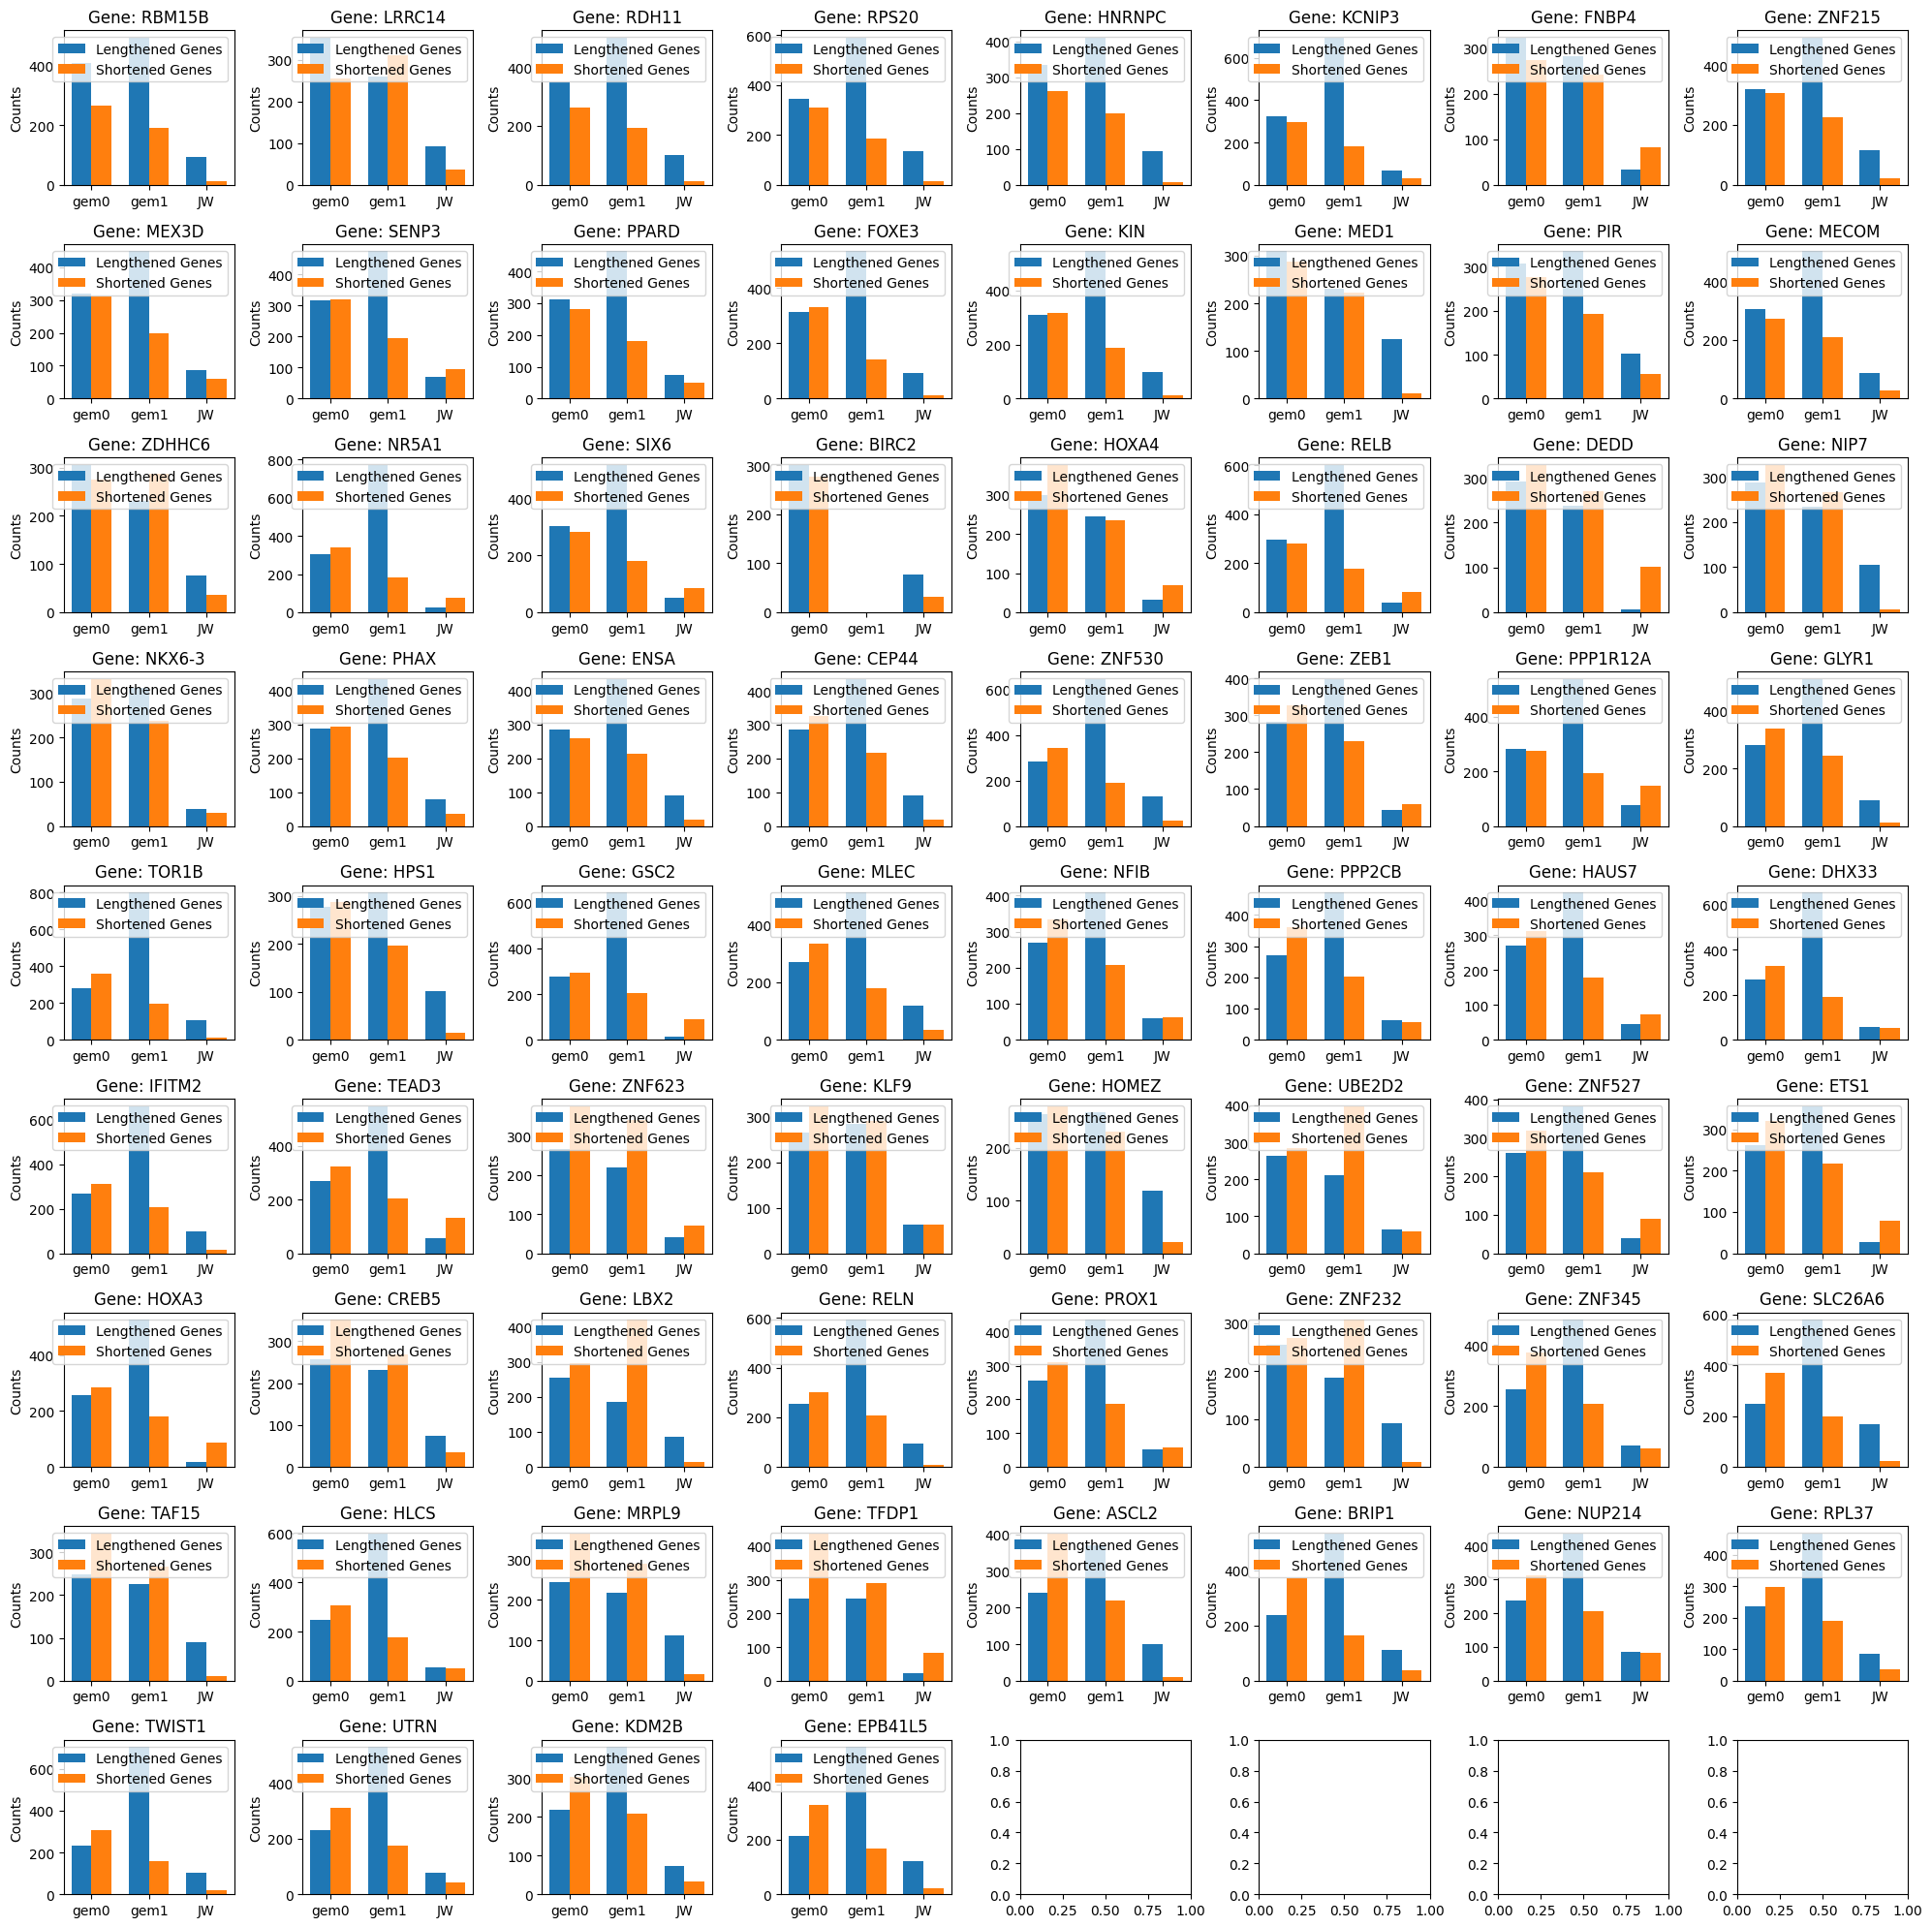

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Combine dataframes
# Assuming the dataframes have been aligned so that they contain the same set of genes
all_genes = gem0_stratified_df['Gene']

# Create subplots
fig, axes = plt.subplots(9, 8, figsize=(20, 20))
axes = axes.flatten()

for idx, gene in enumerate(all_genes):
    ax = axes[idx]

    # Data for gene
    gem0_data = gem0_stratified_df[gem0_stratified_df['Gene'] == gene]
    gem1_data = gem1_stratified_df[gem1_stratified_df['Gene'] == gene]
    JW_data = JW_df[JW_df['Gene'] == gene]

    # Create x and y values for plotting
    labels = ['gem0', 'gem1', 'JW']
    lengthened_values = [gem0_data['lengthened_genes'].values[0], gem1_data['lengthened_genes'].values[0], JW_data['lengthened_genes'].values[0]]
    shortened_values = [gem0_data['shortened_genes'].values[0], gem1_data['shortened_genes'].values[0], JW_data['shortened_genes'].values[0]]

    x = np.arange(len(labels))
    width = 0.35

    # Create bars
    ax.bar(x - width/2, lengthened_values, width, label='Lengthened Genes')
    ax.bar(x + width/2, shortened_values, width, label='Shortened Genes')

    # Additional plot settings
    ax.set_ylabel('Counts')
    ax.set_title(f'Gene: {gene}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

# Remove any unused subplots
for idx in range(len(all_genes), 68):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


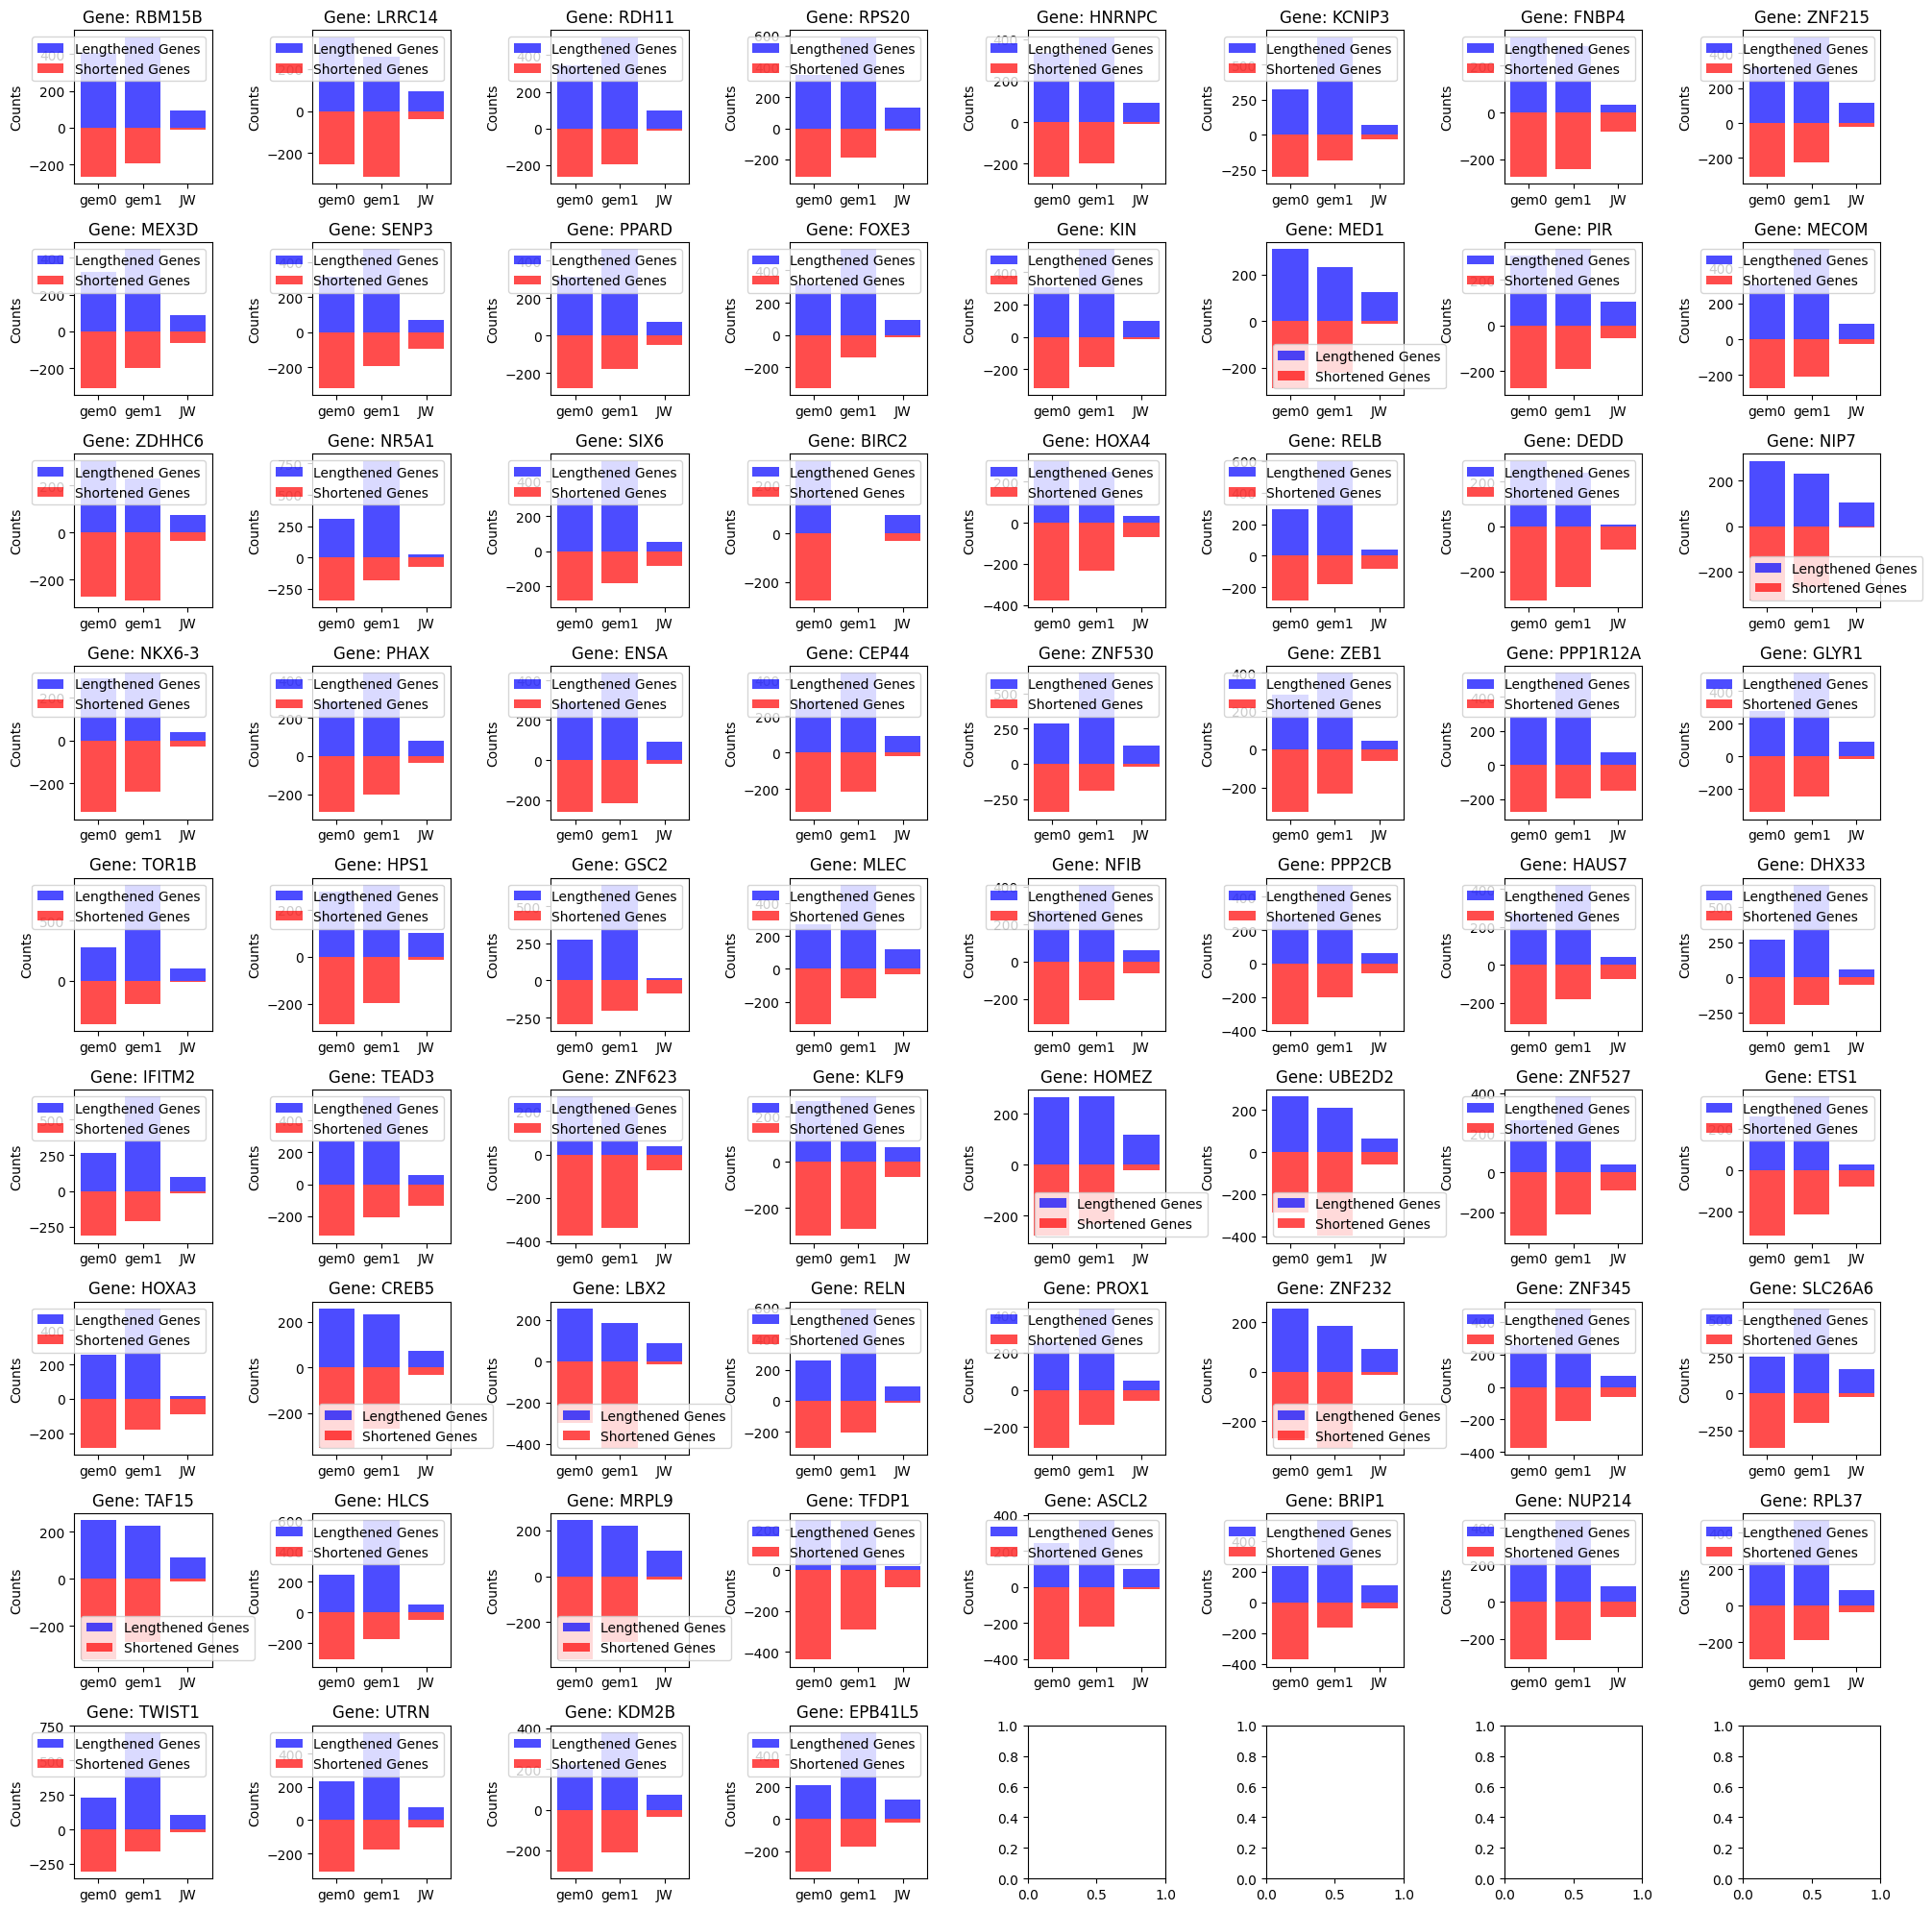

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming gem0_stratified_df, gem1_stratified_df, and JW_df are your DataFrames

# Flatten axes array
all_genes = gem0_stratified_df['Gene']

fig, axes = plt.subplots(9, 8, figsize=(20, 20))
axes = axes.flatten()

# Loop over each gene to create its own subplot
for idx, gene in enumerate(all_genes):
    ax = axes[idx]

    # Prepare the data for the selected gene from each DataFrame
    gem0_data = gem0_stratified_df[gem0_stratified_df['Gene'] == gene].iloc[0]
    gem1_data = gem1_stratified_df[gem1_stratified_df['Gene'] == gene].iloc[0]
    JW_data = JW_df[JW_df['Gene'] == gene].iloc[0]

    lengthened_values = [gem0_data['lengthened_genes'], gem1_data['lengthened_genes'], JW_data['lengthened_genes']]
    shortened_values = [-gem0_data['shortened_genes'], -gem1_data['shortened_genes'], -JW_data['shortened_genes']]

    labels = ['gem0', 'gem1', 'JW']
    
    x = np.arange(len(labels))

    # Create the double-sided bar chart
    ax.bar(x, lengthened_values, color='lightblue', alpha=0.7, label='Lengthened Genes')
    ax.bar(x, shortened_values, color='lightred', alpha=0.7, label='Shortened Genes')

    # Set plot title and labels
    ax.set_title(f'Gene: {gene}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Counts')
    ax.legend()

# Remove unused subplots
for i in range(len(all_genes), 17 * 4):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


/tmp/ipykernel_56979/459627839.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(abs(int(y))) for y in yticks])


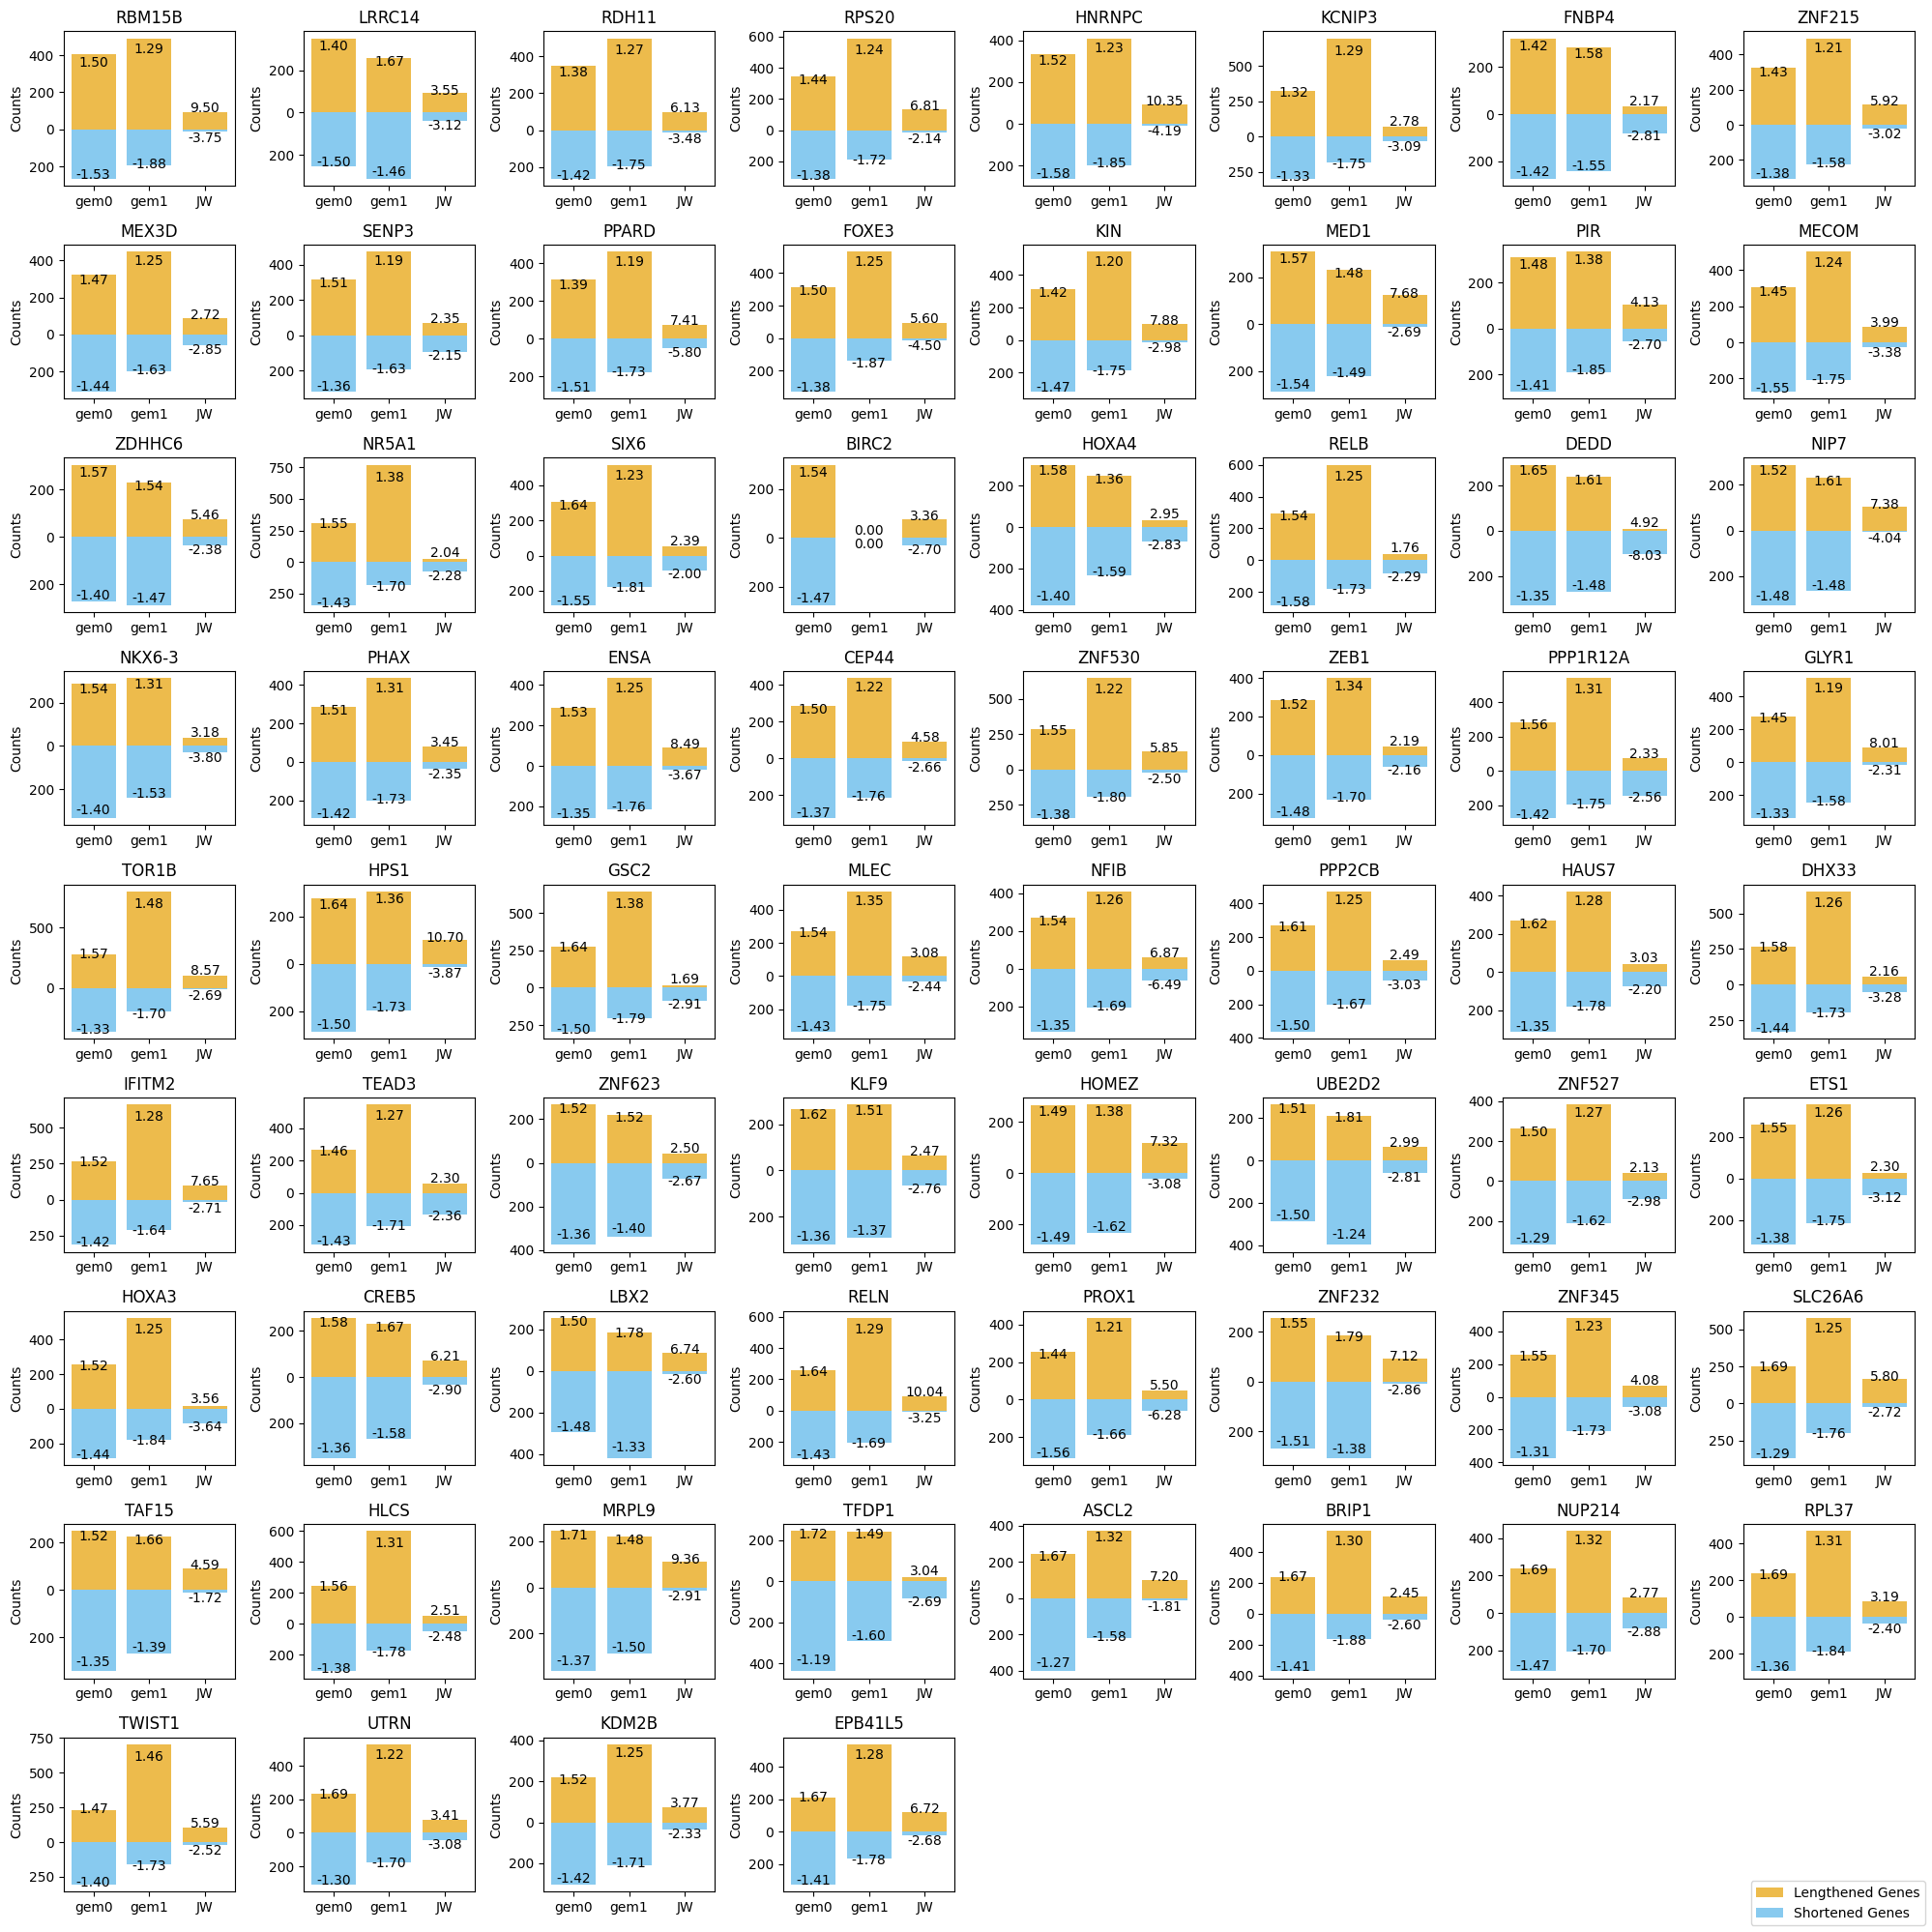

In [136]:
all_genes = gem0_stratified_df['Gene']

fig, axes = plt.subplots(9, 8, figsize=(20, 20))
axes = axes.flatten()

# Loop over each gene to create its own subplot
for idx, gene in enumerate(all_genes):
    ax = axes[idx]

    # Prepare the data for the selected gene from each DataFrame
    gem0_data = gem0_stratified_df[gem0_stratified_df['Gene'] == gene].iloc[0]
    gem1_data = gem1_stratified_df[gem1_stratified_df['Gene'] == gene].iloc[0]
    JW_data = JW_df[JW_df['Gene'] == gene].iloc[0]

    lengthened_values = [gem0_data['lengthened_genes'], gem1_data['lengthened_genes'], JW_data['lengthened_genes']]
    shortened_values = [-gem0_data['shortened_genes'], -gem1_data['shortened_genes'], -JW_data['shortened_genes']]
    distal_APA_effect = [gem0_data['distal_APA_effect'], gem1_data['distal_APA_effect'], JW_data['distal_APA_effect']]
    proximal_APA_effect = [gem0_data['proximal_APA_effect'], gem1_data['proximal_APA_effect'], JW_data['proximal_APA_effect']]

    labels = ['gem0', 'gem1', 'JW']
    
    x = np.arange(len(labels))

    # Create the double-sided bar chart
    ax.bar(x, lengthened_values, color='#E69F00', alpha=0.7)
    ax.bar(x, shortened_values, color='#56B4E9', alpha=0.7)

    # Add APA effect values on top of the bars
    for i, (lengthened, shortened, distal, proximal) in enumerate(zip(lengthened_values, shortened_values, distal_APA_effect, proximal_APA_effect)):
        ax.text(i, lengthened  - 0.2 * abs(lengthened), f'{distal:.2f}', ha='center', va='bottom')
        ax.text(i, shortened + 0.2 * abs(shortened), f'{proximal:.2f}', ha='center', va='top')

    # Set plot title and labels
    ax.set_title(f'{gene}')
    ax.set_xticks(x)
    # make sure y.ticks are positive
    yticks = ax.get_yticks()
    ax.set_yticklabels([str(abs(int(y))) for y in yticks])
    ax.set_xticklabels(labels)
    ax.set_ylabel('Counts')

# Remove unused subplots
for i in range(len(all_genes), 9 * 8):
    fig.delaxes(axes[i])

# Add one legend for the entire figure
fig.legend(['Lengthened Genes', 'Shortened Genes'], loc='lower right')
plt.tight_layout()
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower right', bbox_transform=fig.transFigure)
plt.show()
